## video to img

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

In [5]:
# import cv2
# cap = cv2.VideoCapture('./datasets/coca_cola.mp4') #동영상 불러오기
# num = 0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if not ret:
#         break
#     frame = cv2.flip(frame, -1)
#     if ret:
#         cv2.imshow('frame', frame)
#         #이미지의 각 이름을 자동으로 지정
#         path = './coca_cola_250_' + str(num) + '.jpg'
#         cv2.imwrite(path, frame) #영상 -> 이미지로 저장
#         key = cv2.waitKey(25)
#         if key == 27: # Esc
#             break
#     num += 1
# cap.release()
# cv2.destroyAllWindows()

In [6]:
# import cv2
# video = cv2.VideoCapture('./datasets/coca_cola.mp4')
# width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
# height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
# count = video.get(cv2.CAP_PROP_FRAME_COUNT)
# fps = video.get(cv2.CAP_PROP_FPS)
# print('가로: ', str(width))
# print('세로: ', str(height))
# print('총 프레임수: ', str(count))
# print('FPS: ' + str(fps))

가로:  720.0
세로:  1280.0
총 프레임수:  797.0
FPS: 29.977432296890672


## rename images

In [137]:
# # 사진 이름 한번에 바꾸기(주의! 순서가 랜덤으로 들어온다)

# import os

# file_path = './datasets/Coke' # 바꿔야하는 이미지가 들어있는 파일
# file_names = os.listdir(file_path)

# num = 1
# for name in file_names:
#     src = os.path.join(file_path, name)
#     dst = 'coca_cola_250_' + str(num) + '.jpg' # 바꿀 이름
#     dst = os.path.join(file_path, dst)
#     os.rename(src, dst)
#     num += 1

## load img

In [3]:
path = '/Users/iseung-won/Desktop/mini_project_classifying_drink/non_object/' # folder path
os.chdir(path) # move to the folder
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
no_object_imgs = []
for file in files:
    if '.jpg' in file: 
        src = cv2.imread(file)
        f = cv2.resize(src , (224, 224)) # resize img
        no_object_imgs.append(f)
np.array(no_object_imgs).shape

(2208, 224, 224, 3)

In [5]:
img_list = ['coca_cola_250', 'coca_cola_350', 'pepsi_250', 'pepsi_355', 'pepsi_zero_355', 'pepsi_zero_500','pocari_240', 
            'pocari_620', 'coca_cola_zero_250', 'coca_cola_zero_355', 'chilsung250', 'chilsung355', 'sprite_250', 'sprite_355', ]

coca_cola_250 (488, 224, 224, 3)
coca_cola_350 (701, 224, 224, 3)
pepsi_250 (680, 224, 224, 3)
pepsi_355 (921, 224, 224, 3)
pepsi_zero_355 (1668, 224, 224, 3)
pepsi_zero_500 (486, 224, 224, 3)
pocari_240 (1500, 224, 224, 3)
pocari_620 (1507, 224, 224, 3)
coca_cola_zero_250 (552, 224, 224, 3)
coca_cola_zero_355 (769, 224, 224, 3)
chilsung250 (600, 224, 224, 3)
chilsung355 (600, 224, 224, 3)
sprite_250 (1055, 224, 224, 3)
sprite_355 (855, 224, 224, 3)

In [5]:
imgs = []
for i in range(len(img_list)):
    path = f'/Users/iseung-won/Desktop/mini_project_classifying_drink/{img_list[i]}' # folder path
    os.chdir(path) # move to the folder
    files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    globals()[f'{img_list[i]}_imgs'] = []
    for file in files:
        if '.jpg' in file: 
            src = cv2.imread(file)
            f = cv2.resize(src , (224, 224)) # resize img
            imgs.append(f)

In [6]:
np.array(imgs).shape

(12382, 224, 224, 3)

## XML to CSV

In [7]:
# XML to CSV
import os
import glob
import pandas as pd
import io
import xml.etree.ElementTree as ET
import argparse
def xml_to_csv(path):
  xml_list = []
  for xml_file in glob.glob(path + '/*.xml'):
      tree = ET.parse(xml_file)
      root = tree.getroot()
      filename = root.find('filename').text
      width = int(root.find('size').find('width').text)
      height = int(root.find('size').find('height').text)
      for member in root.findall('object'):
          bndbox = member.find('bndbox')
          value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
          xml_list.append(value)
  column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name)
  return xml_df

In [8]:
for i in range(len(img_list)):
    path = f'/Users/iseung-won/Desktop/mini_project_classifying_drink/{img_list[i]}' # folder path
    globals()[f'{img_list[i]}_info'] = xml_to_csv(path)
    print(img_list[i], globals()[f'{img_list[i]}_info'].shape)

coca_cola_250 (488, 8)
coca_cola_350 (701, 8)
pepsi_250 (680, 8)
pepsi_355 (921, 8)
pepsi_zero_355 (1668, 8)
pepsi_zero_500 (486, 8)
pocari_240 (1500, 8)
pocari_620 (1507, 8)
coca_cola_zero_250 (552, 8)
coca_cola_zero_355 (769, 8)
chilsung250 (600, 8)
chilsung355 (600, 8)
sprite_250 (1055, 8)
sprite_355 (855, 8)


## Preprocessing

In [9]:
for i in range(len(img_list)):
    globals()[f'{img_list[i]}_info_df'] = globals()[f'{img_list[i]}_info'].copy()
    globals()[f'{img_list[i]}_info_df']['class'] = i+1

In [10]:
info_df = pd.concat([globals()[f'{img_list[i]}_info_df'] for i in range(len(img_list))])
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,coca_cola_250_102.jpg,3024,4032,1,152,893,2277,4032
1,coca_cola_250_116.jpg,3024,4032,1,37,53,2197,4032
2,coca_cola_250_300.jpg,1080,1920,1,265,622,739,1570
3,coca_cola_250_466.jpg,1080,1920,1,356,603,772,1453
4,coca_cola_250_472.jpg,1080,1920,1,341,615,780,1492
...,...,...,...,...,...,...,...,...
850,sprite355_277.jpg,720,960,14,236,163,553,722
851,sprite355_511.jpg,720,960,14,102,261,457,798
852,sprite355_505.jpg,720,960,14,132,266,466,788
853,sprite355_263.jpg,720,960,14,208,164,493,705


In [11]:
info_df['xmin'] = round(info_df['xmin'] / (info_df['width']/224))
info_df['xmax'] = round(info_df['xmax'] / (info_df['width']/224))
info_df['ymin'] = round(info_df['ymin'] / (info_df['height']/224))
info_df['ymax'] = round(info_df['ymax'] / (info_df['height']/224))
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,coca_cola_250_102.jpg,3024,4032,1,11.0,50.0,169.0,224.0
1,coca_cola_250_116.jpg,3024,4032,1,3.0,3.0,163.0,224.0
2,coca_cola_250_300.jpg,1080,1920,1,55.0,73.0,153.0,183.0
3,coca_cola_250_466.jpg,1080,1920,1,74.0,70.0,160.0,170.0
4,coca_cola_250_472.jpg,1080,1920,1,71.0,72.0,162.0,174.0
...,...,...,...,...,...,...,...,...
850,sprite355_277.jpg,720,960,14,73.0,38.0,172.0,168.0
851,sprite355_511.jpg,720,960,14,32.0,61.0,142.0,186.0
852,sprite355_505.jpg,720,960,14,41.0,62.0,145.0,184.0
853,sprite355_263.jpg,720,960,14,65.0,38.0,153.0,164.0


In [12]:
info_df['class'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [13]:
info_df['rec_width'] = info_df['xmax'] - info_df['xmin']
info_df['rec_height'] = info_df['ymax'] - info_df['ymin']
info_df['x'] = round((info_df.xmin + info_df.xmax)/2)  #바인딩 박스 중심 x점
info_df['y'] = round((info_df.ymin + info_df.ymax)/2)  #바인딩 박스 중심 y점
info_df['object'] = 1  #객체 유무(0:없음, 1:있음)
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_102.jpg,3024,4032,1,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1
1,coca_cola_250_116.jpg,3024,4032,1,3.0,3.0,163.0,224.0,160.0,221.0,83.0,114.0,1
2,coca_cola_250_300.jpg,1080,1920,1,55.0,73.0,153.0,183.0,98.0,110.0,104.0,128.0,1
3,coca_cola_250_466.jpg,1080,1920,1,74.0,70.0,160.0,170.0,86.0,100.0,117.0,120.0,1
4,coca_cola_250_472.jpg,1080,1920,1,71.0,72.0,162.0,174.0,91.0,102.0,116.0,123.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,sprite355_277.jpg,720,960,14,73.0,38.0,172.0,168.0,99.0,130.0,122.0,103.0,1
851,sprite355_511.jpg,720,960,14,32.0,61.0,142.0,186.0,110.0,125.0,87.0,124.0,1
852,sprite355_505.jpg,720,960,14,41.0,62.0,145.0,184.0,104.0,122.0,93.0,123.0,1
853,sprite355_263.jpg,720,960,14,65.0,38.0,153.0,164.0,88.0,126.0,109.0,101.0,1


In [14]:
object_info_df = pd.DataFrame(np.zeros((len(no_object_imgs), 13)))
object_info_df.columns = ['filename','width', 'height', 'class','xmin', 'ymin', 'xmax', 'ymax', 
                          'rec_width', 'rec_height', 'x', 'y', 'object']
object_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
np.array(imgs).shape

(12382, 224, 224, 3)

In [16]:
total_info_df = pd.concat([info_df, object_info_df])

In [17]:
total_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_102.jpg,3024.0,4032.0,1.0,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1.0
1,coca_cola_250_116.jpg,3024.0,4032.0,1.0,3.0,3.0,163.0,224.0,160.0,221.0,83.0,114.0,1.0
2,coca_cola_250_300.jpg,1080.0,1920.0,1.0,55.0,73.0,153.0,183.0,98.0,110.0,104.0,128.0,1.0
3,coca_cola_250_466.jpg,1080.0,1920.0,1.0,74.0,70.0,160.0,170.0,86.0,100.0,117.0,120.0,1.0
4,coca_cola_250_472.jpg,1080.0,1920.0,1.0,71.0,72.0,162.0,174.0,91.0,102.0,116.0,123.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
total_X = imgs + no_object_imgs
total_X  = np.array(total_X)
total_X.shape

(14590, 224, 224, 3)

In [19]:
total_info_df.index = [i for i in range(total_info_df.shape[0])]
total_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_102.jpg,3024.0,4032.0,1.0,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1.0
1,coca_cola_250_116.jpg,3024.0,4032.0,1.0,3.0,3.0,163.0,224.0,160.0,221.0,83.0,114.0,1.0
2,coca_cola_250_300.jpg,1080.0,1920.0,1.0,55.0,73.0,153.0,183.0,98.0,110.0,104.0,128.0,1.0
3,coca_cola_250_466.jpg,1080.0,1920.0,1.0,74.0,70.0,160.0,170.0,86.0,100.0,117.0,120.0,1.0
4,coca_cola_250_472.jpg,1080.0,1920.0,1.0,71.0,72.0,162.0,174.0,91.0,102.0,116.0,123.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train, Test split

In [20]:
Y = total_info_df[['class', 'rec_width', 'rec_height', 'x', 'y', 'object']]
Y

,class,rec_width,rec_height,x,y,object
0,1.0,158.0,174.0,90.0,137.0,1.0
1,1.0,160.0,221.0,83.0,114.0,1.0
2,1.0,98.0,110.0,104.0,128.0,1.0
3,1.0,86.0,100.0,117.0,120.0,1.0
4,1.0,91.0,102.0,116.0,123.0,1.0
...,...,...,...,...,...,...
14585,0.0,0.0,0.0,0.0,0.0,0.0
14586,0.0,0.0,0.0,0.0,0.0,0.0
14587,0.0,0.0,0.0,0.0,0.0,0.0
14588,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
img_csv = total_X.reshape(14590, 150528)

In [22]:
df_img = pd.DataFrame(img_csv)
df_img

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,57,55,54,54,52,51,55,53,52,50,...,217,205,214,217,206,215,218,204,213,216
1,141,164,179,146,171,181,151,176,186,158,...,193,173,196,191,177,200,195,179,202,197
2,124,52,99,76,12,62,92,24,70,78,...,176,162,173,177,164,175,179,164,175,179
3,228,222,221,235,230,227,239,234,231,238,...,202,181,189,190,156,163,166,134,141,144
4,168,155,245,107,108,219,96,99,218,93,...,147,131,140,146,131,141,148,131,141,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,214,216,217,214,216,217,214,216,217,214,...,44,41,47,44,43,54,48,49,62,57
14586,233,231,231,233,231,231,233,231,231,234,...,186,62,123,187,65,126,190,70,131,195
14587,33,43,43,43,50,53,113,120,122,108,...,235,230,233,238,230,233,238,229,232,237
14588,237,235,235,237,235,235,237,235,235,237,...,92,70,63,94,68,60,99,69,56,102


In [25]:
c1 = df_img.iloc[:,:10000]
c2 = df_img.iloc[:,10000:20000]
c3 = df_img.iloc[:,20000:30000]
c4 = df_img.iloc[:,30000:40000]
c5 = df_img.iloc[:,40000:50000]
c6 = df_img.iloc[:,50000:60000]
c7 = df_img.iloc[:,60000:70000]
c8 = df_img.iloc[:,70000:80000]
c9 = df_img.iloc[:,80000:90000]
c10 = df_img.iloc[:,90000:100000]
c11 = df_img.iloc[:,100000:110000]
c12 = df_img.iloc[:,:11000:120000]
c13 = df_img.iloc[:,:12000:130000]
c14 = df_img.iloc[:,:13000:140000]
c15 = df_img.iloc[:,:14000:150000]
c16 = df_img.iloc[:,:15000:]

In [26]:
c1.to_csv('/Users/iseung-won/Downloads/project_img1.csv')
c2.to_csv('/Users/iseung-won/Downloads/project_img2.csv')
c3.to_csv('/Users/iseung-won/Downloads/project_img3.csv')
c4.to_csv('/Users/iseung-won/Downloads/project_img4.csv')
c5.to_csv('/Users/iseung-won/Downloads/project_img5.csv')
c6.to_csv('/Users/iseung-won/Downloads/project_img6.csv')
c7.to_csv('/Users/iseung-won/Downloads/project_img7.csv')
c8.to_csv('/Users/iseung-won/Downloads/project_img8.csv')
c9.to_csv('/Users/iseung-won/Downloads/project_img9.csv')
c10.to_csv('/Users/iseung-won/Downloads/project_img10.csv')
c11.to_csv('/Users/iseung-won/Downloads/project_img11.csv')
c12.to_csv('/Users/iseung-won/Downloads/project_img12.csv')
c13.to_csv('/Users/iseung-won/Downloads/project_img13.csv')
c14.to_csv('/Users/iseung-won/Downloads/project_img14.csv')
c15.to_csv('/Users/iseung-won/Downloads/project_img15.csv')
c16.to_csv('/Users/iseung-won/Downloads/project_img16.csv')

In [84]:
Y.to_csv('/Users/iseung-won/Downloads/project_y_train.csv')

In [76]:
224*224*3

150528

In [ ]:
df = pd.read_csv('/Users/iseung-won/Downloads/project_img.csv')
df

In [377]:
x_train, x_test, y_train, y_test = train_test_split(np.array(total_X), np.array(Y),
                                                    test_size=0.2, shuffle=True, stratify=Y['class'], random_state=34)

In [389]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7068, 224, 224, 3) (1767, 224, 224, 3) (7068, 6) (1767, 6)


In [379]:
y_train

array([[  3., 177.,  83.,  88., 110.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  8., 103., 127., 112., 144.,   1.],
       ...,
       [  3., 186.,  71., 119., 108.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  6., 129., 205., 106., 122.,   1.]])

In [381]:
# y1_train, y1_test = y_train[['rec_width', 'rec_height', 'x', 'y']] , y_test[['rec_width', 'rec_height', 'x', 'y']]
# y2_train, y2_test = y_train[['class']], y_test[['class']]
# y3_train, y3_test = y_train[['object']], y_test[['object']]

In [382]:
x_trn = x_train/255
x_ts = x_test/255

In [385]:
print(x_trn.shape, x_ts.shape)
#print(y1_train.shape, y2_train.shape, y3_train.shape)

(7068, 224, 224, 3) (1767, 224, 224, 3)


## Modeling

In [386]:
inputs = Input(shape=(224, 224, 3))
x = Conv2D(filters=6, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = MaxPooling2D(3, 3)(x)

x1 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x)                      
x2 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x2 = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(x2)
x3 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x3 = Conv2D(filters=30, kernel_size=5, strides=1, padding='same', activation='relu')(x3)
x4 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x)  
x4 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x4)

In [387]:
outputs = tf.concat([x1, x2, x3, x4], axis=3)    
outputs = Flatten()(outputs)
outputs = Dense(6, activation= 'linear')(outputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss=['mse'], metrics=['mse'], optimizer='adam')

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 112, 112, 6)  456         ['input_7[0][0]']                
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 37, 37, 6)   0           ['conv2d_42[0][0]']              
 )                                                                                                
                                                                                            

In [410]:
history = model.fit(x_trn, y_train,
                     epochs=10, batch_size=1)

MemoryError: Unable to allocate 3.96 GiB for an array with shape (7068, 224, 224, 3) and data type float32

In [ ]:
# 1GB가 1024MB이므로 1024x8x1.5=12288
3.96 * 1024

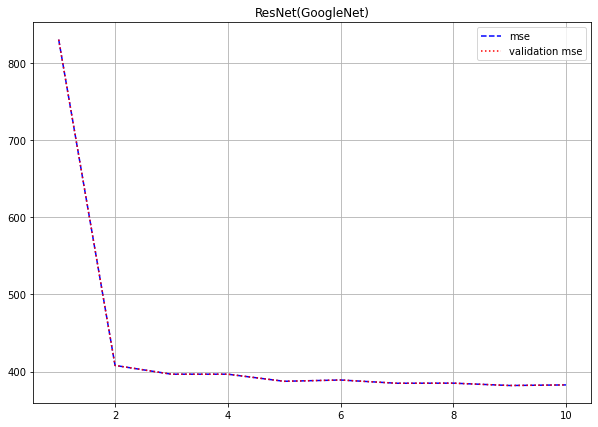

In [291]:
mse = history.history['mse']
val_mse = history.history['mse']

epochs = range(1, len(mse)+1)

plt.figure(figsize=(10, 7))
plt.title('ResNet(GoogleNet)')
plt.plot(epochs, mse, 'b--', label='mse')
plt.plot(epochs, val_mse, 'r:', label='validation mse')
plt.grid()
plt.legend()

plt.show()

In [293]:
pred = model.predict(x_ts)

54/54 [==============================] - 3s 51ms/step


In [344]:
y_test

,class,rec_width,rec_height,x,y,object
1,14.0,99.0,140.0,122.0,104.0,1.0
2,2.0,176.0,170.0,90.0,117.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,12.0,98.0,103.0,144.0,132.0,1.0
...,...,...,...,...,...,...
1695,7.0,91.0,104.0,90.0,142.0,1.0
1696,3.0,170.0,100.0,85.0,116.0,1.0
1697,0.0,0.0,0.0,0.0,0.0,0.0
1698,2.0,212.0,176.0,106.0,89.0,1.0


In [343]:
y_test.index = range(1, y_test.shape[0] + 1)
y_test.iloc[1694]

class           7.0
rec_width      91.0
rec_height    104.0
x              90.0
y             142.0
object          1.0
Name: 1695, dtype: float64

In [342]:
total_info_df.index = range(1, total_info_df.shape[0] + 1)
total_info_df[(total_info_df.x == 90) & (total_info_df.y == 142)]

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
2984,pocari_240_1059.jpg,720.0,1280.0,7.0,44.0,90.0,135.0,194.0,91.0,104.0,90.0,142.0,1.0


In [302]:
pd.DataFrame(pred).iloc[1694]

0      7.748427
1    101.420319
2    123.378883
3    104.519379
4    113.273216
5      1.147538
Name: 1694, dtype: float32

In [334]:
x_test.shape

(1699, 224, 224, 3)

In [319]:
x_train[1694].shape

(224, 224, 3)

In [333]:
plt.imshow(x_test[])

IndexError: index 2983 is out of bounds for axis 0 with size 1699

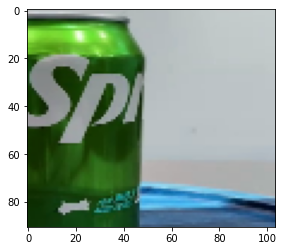

In [327]:
w, h, x, y, _= y_test.iloc[1694][1:]

plt.imshow(x_test[1694][int(x - w / 2):int(x + w/2), int(y - h / 2):int(y + h/2)])

In [328]:
total_info_df[total_info_df.]

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_1.jpg,3024.0,4032.0,1.0,89.0,71.0,169.0,204.0,80.0,133.0,129.0,138.0,1.0
1,coca_cola_250_10.jpg,3024.0,4032.0,1.0,47.0,5.0,180.0,202.0,133.0,197.0,114.0,104.0,1.0
2,coca_cola_250_100.jpg,3024.0,4032.0,1.0,38.0,19.0,175.0,205.0,137.0,186.0,106.0,112.0,1.0
3,coca_cola_250_101.jpg,3024.0,4032.0,1.0,1.0,40.0,146.0,223.0,145.0,183.0,74.0,132.0,1.0
4,coca_cola_250_102.jpg,3024.0,4032.0,1.0,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
